# Тестовое задание

In [158]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [115]:
data = pd.read_csv('topface.csv', encoding='UTF-8')
data.drop('Unnamed: 5', axis=1, inplace=True)
data

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,"11 693,70",ВНУТРЕННИЙ,-,-,-,-
2,14.0,"5 452,70",ОПЛАЧЕНО,Петрова,новая,оригинал,26.07.21
3,15.0,"13 991,70",ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21
4,16.0,"719,7",ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21
...,...,...,...,...,...,...,...
725,285.0,"4 328,70",ОПЛАЧЕНО,Васильев,текущая,оригинал,15.11.21
726,360.0,"3 096,20",ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN
727,360.0,"3 096,20",ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN
728,373.0,"4 403,70",ОПЛАЧЕНО,Михайлов,новая,оригинал,08.11.21


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    object 
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   document        709 non-null    object 
 6   receiving_date  607 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.0+ KB


In [117]:
float_sum = []
for i in data['sum']:
    if type(i) != float:
        i = i.replace(',', '.').split()
        if len(i) == 2:
            new_i = int(i[0]) * 1000 + float(i[1])
            float_sum.append(float(new_i))
        else:
            float_sum.append(float(i[0]))
    else:
        float_sum.append(i)

In [118]:
data.drop(['sum'], axis=1, inplace=True)
data.insert(loc=1, column='summ', value=float_sum)
data

,client_id,summ,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,26.07.21
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21
...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,15.11.21
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,08.11.21


### 1. Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [132]:
may_index = data[data.status.str.contains('Май 2021')].index[0]
june_index = data[data.status.str.contains('Июнь 2021')].index[0]
july_index = data[data.status.str.contains('Июль 2021')].index[0]
august_index = data[data.status.str.contains('Август 2021')].index[0]
september_index = data[data.status.str.contains('Сентябрь 2021')].index[0]
october_index = data[data.status.str.contains('Октябрь 2021')].index[0]

In [131]:
july_data = data[july_index:august_index]
july_data

,client_id,summ,status,sale,new/current,document,receiving_date
258,NaN,NaN,Июль 2021,NaN,NaN,NaN,NaN
259,15.0,13838.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,09.08.21
260,16.0,1586.5,ОПЛАЧЕНО,Иванов,текущая,оригинал,09.08.21
261,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,НЕТ,NaN
262,21.0,4313.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,17.09.21
...,...,...,...,...,...,...,...
364,277.0,4878.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,03.08.21
365,281.0,11703.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,13.08.21
366,284.0,1977.7,ПРОСРОЧЕНО,Филимонова,текущая,НЕТ,NaN
367,286.0,4048.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,11.08.21


In [122]:
july_data.status.value_counts()

ОПЛАЧЕНО      109
ПРОСРОЧЕНО      1
Name: status, dtype: int64

In [190]:
july_data[july_data.status.str.contains('ПРОСРОЧЕНО')]

,client_id,summ,status,sale,new/current,document,receiving_date
366,284.0,1977.7,ПРОСРОЧЕНО,Филимонова,текущая,НЕТ,NaN


In [125]:
benefit = 0
for i in july_data.drop(366)['summ']:
    benefit += float(i)
benefit

859896.4699999987

**Общая выручка за Июль 2021 составила 859896.5 рублей**

### 2. Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

In [146]:
for index, row in data.iterrows():
    if type(row.sale) != str:
        summa = 0
        print(index)

0
129
258
369
484
594


In [163]:
month_revenue = []
may_data = data[may_index:june_index]
june_data = data[june_index:july_index]
july_data = data[july_index:august_index]
august_data = data[august_index:september_index]
september_data = data[september_index:october_index]
october_data = data[october_index:]
month_revenue.append(int(may_data.summ.sum()))
month_revenue.append(int(june_data.summ.sum()))
month_revenue.append(int(july_data.summ.sum()))
month_revenue.append(int(august_data.summ.sum()))
month_revenue.append(int(september_data.summ.sum()))
month_revenue.append(int(october_data.summ.sum()))
month_revenue

[809572, 810266, 861874, 850435, 820383, 1033148]

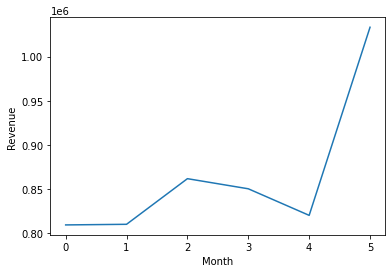

In [164]:
plt.plot(month_revenue)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

### 3. Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [191]:
september_data.sale.value_counts()

Смирнов       27
Петрова       23
Андреев       17
Иванов        11
Кузнецова     11
Филимонова     8
Васильев       6
Соколов        5
Михайлов       1
Name: sale, dtype: int64

In [188]:
september_data.status.value_counts()

ОПЛАЧЕНО         93
В РАБОТЕ         11
ПРОСРОЧЕНО        5
Сентябрь 2021     1
Name: status, dtype: int64

In [186]:
september_data.sale.unique()[1:]

array(['Иванов', 'Кузнецова', 'Андреев', 'Филимонова', 'Смирнов',
       'Петрова', 'Васильев', 'Соколов', 'Михайлов'], dtype=object)

In [187]:
sales = {}
for i in september_data.sale.unique()[1:]:
    sales[i] = september_data[september_data.sale.str.contains(i, na=False)].summ.sum()
{k: v for k, v in sorted(sales.items(), key=lambda item: item[1])}

{'Михайлов': 4268.7,
 'Соколов': 35183.5,
 'Васильев': 49895.45,
 'Филимонова': 59514.47,
 'Кузнецова': 72228.4,
 'Иванов': 94770.59999999999,
 'Андреев': 133652.50000000003,
 'Петрова': 149344.46,
 'Смирнов': 221525.7}

**Смирнов показал наилучшие результаты за сентябрь (так же у него нет просроченых заказов)**

### 4. Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [194]:
october_data['new/current'].value_counts()

текущая    99
новая      36
Name: new/current, dtype: int64

**Ответ: текущая**

### 5. Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [217]:
june_data.drop(178)

,client_id,summ,status,sale,new/current,document,receiving_date
129,NaN,NaN,Июнь 2021,NaN,NaN,NaN,NaN
130,316.0,35653.7,ОПЛАЧЕНО,Петрова,новая,оригинал,09.08.21
131,15.0,13518.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,09.07.21
132,16.0,985.3,ОПЛАЧЕНО,Иванов,текущая,оригинал,09.07.21
133,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,09.09.21
...,...,...,...,...,...,...,...
253,281.0,5733.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,22.07.21
254,282.0,953.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,16.07.21
255,284.0,8823.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,08.09.21
256,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,22.07.21


In [219]:
counter = 0
for index, row in june_data.iterrows():
    if type(row.receiving_date) != float and row.document == 'оригинал':
        if row.receiving_date.split('.')[1] == '05':
            counter += 1
counter

1

**Ответ: 1**

# Задание

Задание:

За каждую заключенную сделку менеджер получает бонус, который рассчитывается следующим образом.


1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с клиентом (в рассматриваемом месяце).


2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и 3 % от суммы, если меньше. При этом статус оплаты может быть любым, кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного договора с клиентом (в рассматриваемом месяце).


Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого месяца, считаются **остатком** на следующий период, который выплачивается по мере прихода оригиналов.


**Вычислите остаток каждого из менеджеров на 01.07.2021.**

In [272]:
month_column = []
for i in data.receiving_date:
    if type(i) != float and i != '-':
        month_column.append(int(i.split('.')[1]))
    else:
        month_column.append(i)
data.insert(loc=7, column='receiving_month', value=month_column)

In [295]:
new_deal = data[:july_index]
new_deal = new_deal[new_deal['new/current'].str.contains('новая', na=False)&new_deal['document'].str.contains('оригинал', na=False)&new_deal['status'].str.contains('ОПЛАЧЕНО', na=False)]
new_deal_future = new_deal.sort_values(by='receiving_month')[4:]

In [335]:
current_deal = data[:july_index]
current_deal = current_deal[current_deal['new/current'].str.contains('текущая', na=False)]
drop_index = current_deal[current_deal.status.str.contains('ПРОСРОЧЕНО', na=False)].index
current_deal.drop(list(drop_index), inplace=True)
current_deal_future = current_deal.sort_values(by='receiving_month')[76:-1]

In [303]:
new_deal_future

,client_id,summ,status,sale,new/current,document,receiving_date,receiving_month
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,26.07.21,7
236,300.0,3053.7,ОПЛАЧЕНО,Смирнов,новая,оригинал,22.07.21,7
169,290.0,18453.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,06.07.21,7
168,77.0,16653.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,06.07.21,7
142,36.0,3868.7,ОПЛАЧЕНО,Филимонова,новая,оригинал,08.07.21,7
125,281.0,4488.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,16.07.21,7
45,85.0,9083.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,13.07.21,7
44,84.0,3558.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,13.07.21,7
43,83.0,8763.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,13.07.21,7
254,282.0,953.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,16.07.21,7


In [316]:
new_managers_remainder = {}
for i in new_deal_future.sale.unique():
    new_managers_remainder[i] = float(new_deal_future[new_deal_future.sale.str.contains(i, na=False)].summ.sum() * 0.07)

In [336]:
current_deal_future

,client_id,summ,status,sale,new/current,document,receiving_date,receiving_month
172,84.0,1673.70,ОПЛАЧЕНО,Селиванов,текущая,оригинал,13.07.21,7
174,86.0,3473.70,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,08.07.21,7
247,264.0,8773.70,ОПЛАЧЕНО,Смирнов,текущая,оригинал,27.07.21,7
250,270.0,5448.70,ОПЛАЧЕНО,Васильев,текущая,оригинал,07.07.21,7
200,129.0,3015.45,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,07.07.21,7
...,...,...,...,...,...,...,...,...
22,47.0,4449.70,ОПЛАЧЕНО,Петрова,текущая,оригинал,23.09.21,9
29,59.0,3938.70,ОПЛАЧЕНО,Петрова,текущая,оригинал,23.09.21,9
150,49.0,7203.70,ОПЛАЧЕНО,Петрова,текущая,оригинал,06.09.21,9
24,48.0,4452.70,ОПЛАЧЕНО,Петрова,текущая,оригинал,08.10.21,10


In [318]:
current_managers_remainder_5 = {}
current_managers_remainder_3 = {}
for index, row in current_deal_future.iterrows():
    if row.summ > 10000:
        current_managers_remainder_5[row.sale] = float(current_deal_future[current_deal_future.sale.str.contains(row.sale, na=False)].summ.sum() * 0.05)
    else:
        current_managers_remainder_3[row.sale] = float(current_deal_future[current_deal_future.sale.str.contains(row.sale, na=False)].summ.sum() * 0.03)

In [332]:
from collections import Counter
c = Counter()

all_remainder = (new_managers_remainder, current_managers_remainder_5, current_managers_remainder_3)

for person in all_remainder:
    c.update(person)
    
dict(c)

{'Петрова': 21483.7344,
 'Смирнов': 14211.207000000006,
 'Селиванов': 5297.69,
 'Филимонова': 2317.9579,
 'Васильев': 1037.049,
 'Андреев': 8262.1032,
 'Иванов': 11985.024000000005,
 'Кузнецова': 11317.746400000004,
 'Соколов': 269.211}